<a href="https://colab.research.google.com/github/Shivanissm/Detection-of-pulmonary-diseases-using-lung-sounds/blob/main/Respirartory_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa

In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

In [ ]:
import os

file_path = r"C:\Users\Shivani\Downloads\archive (4)\output_loc\Al\203_1p2_Al_mc_AKGC417L_5675.wav"
if os.path.exists(file_path):
    print("File is accessible!")
else:
    print("File not found. Please check the path.")


/content/226_1b1_Al_sc_Meditron_6879.wav

In [ ]:
import os
print(os.path.exists("/content/226_1b1_Al_sc_Meditron_6879.wav"))


True


In [ ]:
!pip install librosa tensorflow scikit-learn


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_and_preprocess_data(file_path):

    audio, sr = librosa.load(file_path, sr=None)


    audio = librosa.effects.trim(audio, top_db=30)[0]

    audio = librosa.util.normalize(audio)

    return audio, sr

def extract_features(audio, sr):

    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mfccs, mel_spec_db

def segment_breathing_cycles(audio, sr, cycle_duration=2.0):
    num_segments = int(len(audio) / (sr * cycle_duration))
    segments = np.array_split(audio, num_segments)

    return segments

def plot_mel_spectrogram(mel_spec_db, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.tight_layout()
    plt.show()

def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def prepare_data(file_paths, labels):
    features = []
    for file_path in file_paths:
        audio, sr = load_and_preprocess_data(file_path)
        segments = segment_breathing_cycles(audio, sr)

        for segment in segments:
            _, mel_spec_db = extract_features(segment, sr)
            mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)
            features.append(mel_spec_db)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels


file_paths = ["/content/226_1b1_Al_sc_Meditron_6879.wav",
              "/content/226_1b1_Al_sc_Meditron_6879.wav"]
labels = [0, 1]

features, labels = prepare_data(file_paths, labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

input_shape = (features.shape[1], features.shape[2], features.shape[3])
model = build_cnn_model(input_shape)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 21.9707
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.0579
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.1603
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.2729
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.3922
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.5148
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 22.6392
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy:

In [ ]:
import os

file_paths = [
    "/content/226_1b1_Al_sc_Meditron_6879.wav",
    "/content/other_file.wav"
]

for file_path in file_paths:
    if os.path.exists(file_path):
        print(f"File found: {file_path}")
    else:
        print(f"File not found: {file_path}")


File found: /content/226_1b1_Al_sc_Meditron_6879.wav
File not found: /content/other_file.wav


In [ ]:
file_path = "/content/other_file.wav"


In [ ]:
import os

file_path = "/content/other_file.wav"
if os.path.exists(file_path):
    print(f"File exists: {file_path}")
else:
    print(f"File not found: {file_path}")


File not found: /content/other_file.wav


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 226_1b1_Al_sc_Meditron_6880.wav to 226_1b1_Al_sc_Meditron_6880.wav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/path_to_file/other_file.wav"


In [ ]:
file_paths = [
    "/content/226_1b1_Al_sc_Meditron_6879.wav",
    "/content/226_1b1_Al_sc_Meditron_6880.wav"
]
labels = [0, 1]

features, labels = prepare_data(file_paths, labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


input_shape = (features.shape[1], features.shape[2], features.shape[3])
model = build_cnn_model(input_shape)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 14.6232 - val_accuracy: 0.0000e+00 - val_loss: 62.5032
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 102.9287
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 135.5348
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 163.5872
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 188.5437
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 211.1153
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 231.5771
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - acc

In [ ]:
file_path = "/content/other_file.wav"

In [ ]:
import os

file_path = "/content/other_file.wav"
if os.path.exists(file_path):
    print(f"File exists: {file_path}")
else:
    print(f"File not found: {file_path}")

File not found: /content/other_file.wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 224_1b1_Tc_sc_Meditron_6845.wav to 224_1b1_Tc_sc_Meditron_6845.wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 223_1b1_Pr_sc_Meditron_6838.wav to 223_1b1_Pr_sc_Meditron_6838 (1).wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 225_1b1_Pl_sc_Meditron_6871.wav to 225_1b1_Pl_sc_Meditron_6871 (1).wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 222_1b1_Lr_sc_Meditron_6763.wav to 222_1b1_Lr_sc_Meditron_6763 (1).wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 226_1b1_Ll_sc_Meditron_6891.wav to 226_1b1_Ll_sc_Meditron_6891.wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 223_1b1_Ar_sc_Meditron_6796.wav to 223_1b1_Ar_sc_Meditron_6796.wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 221_2b3_Al_mc_LittC2SE_6721.wav to 221_2b3_Al_mc_LittC2SE_6721 (1).wav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/path_to_file/other_file.wav"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3125 - loss: 19.8140 - val_accuracy: 0.2500 - val_loss: 268.3802
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.5000 - loss: 193.9842 - val_accuracy: 0.2500 - val_loss: 111.3897
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.3125 - loss: 206.1859 - val_accuracy: 0.5000 - val_loss: 29.1093
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - accuracy: 0.3750 - loss: 126.0016 - val_accuracy: 0.2500 - val_loss: 27.4807
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step - accuracy: 0.5625 - loss: 109.8381 - val_accuracy: 0.2500 - val_loss: 27.0187
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - accuracy: 0.4375 - loss: 67.3421 - val_accuracy: 0.2500 - val_loss: 18.4276
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - accuracy: 0.5625 - loss: 34.0314 - val_accuracy: 0.2500 - val_loss: 8.1925
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.5625 - loss: 9.3835 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


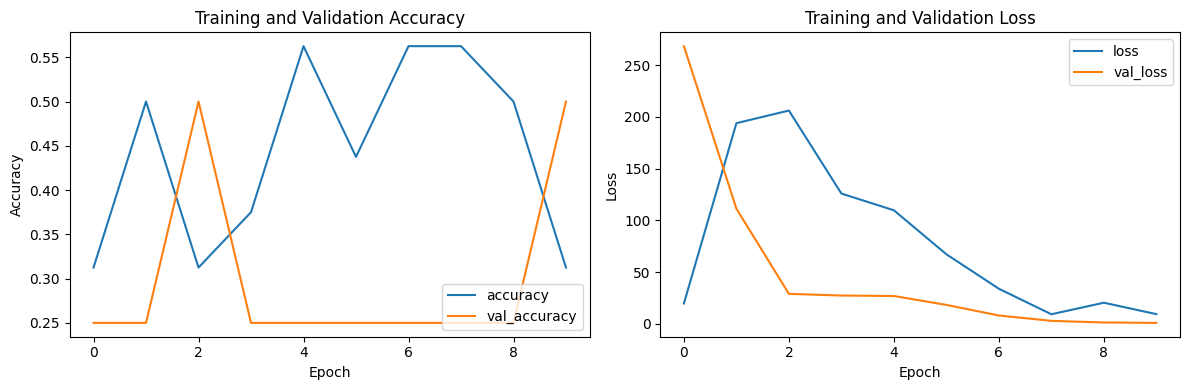

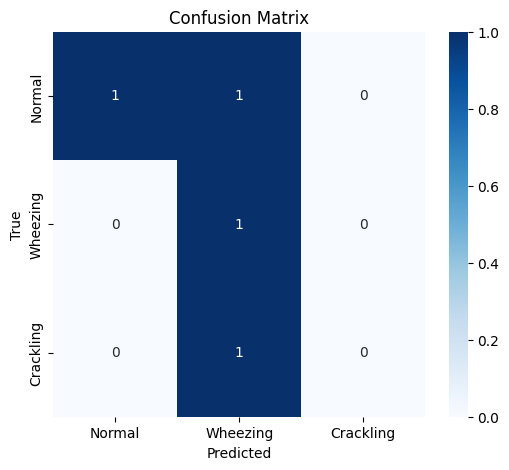

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Step 1: Load and Preprocess Data
def load_and_preprocess_data(file_path):
    # Load lung sound data using Librosa
    audio, sr = librosa.load(file_path, sr=None)

    # Apply noise reduction (trim silence)
    audio = librosa.effects.trim(audio, top_db=30)[0]

    # Normalize audio data
    audio = librosa.util.normalize(audio)  # Normalize audio

    return audio, sr

# Step 2: Extract MFCC and Mel-spectrogram Features
def extract_features(audio, sr, target_size=(128, 128)):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=64, fmax=sr/2)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize Mel-spectrogram to a fixed size for consistency
    mel_spec_db_resized = np.resize(mel_spec_db, target_size)

    return mel_spec_db_resized

# Step 3: Segment Breathing Cycles (Inhalation/Exhalation)
def segment_breathing_cycles(audio, sr, cycle_duration=2.0):
    total_duration = len(audio) / sr
    if total_duration < cycle_duration:
        print(f"Warning: Audio is too short for segmentation. Audio duration: {total_duration:.2f} seconds")
        return [audio]  # Return the entire audio as one segment

    num_segments = int(len(audio) / (sr * cycle_duration))
    segments = np.array_split(audio, num_segments)

    return segments

# Step 4: Build CNN Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout layer to prevent overfitting
        Dense(3, activation='softmax')  # Output: 3 classes (Normal, Wheezing, Crackling)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Prepare Data for Model
def prepare_data(file_paths, labels):
    features = []
    final_labels = []  # This will hold the correct labels for each feature

    for file_path, label in zip(file_paths, labels):
        audio, sr = load_and_preprocess_data(file_path)
        segments = segment_breathing_cycles(audio, sr)

        for segment in segments:
            mel_spec_db = extract_features(segment, sr)
            mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)  # Add channel dimension
            features.append(mel_spec_db)
            final_labels.append(label)

    features = np.array(features)
    final_labels = np.array(final_labels)

    return features, final_labels

# Step 6: Main Workflow
 = [
    "/content/208_1b1_Ll_sc_Meditron_6189.wav",
    "/content/221_2b3_Al_mc_LittC2SE_6721.wav",
    "/content/222_1b1_Lr_sc_Meditron_6761.wav",
    "/content/222_1b1_Lr_sc_Meditron_6763.wav",
    "/content/223_1b1_Al_sc_Meditron_6783.wav",
    "/content/223_1b1_Ar_sc_Meditron_6794.wav",
    "/content/223_1b1_Ar_sc_Meditron_6797.wav",
    "/content/223_1b1_Pr_sc_Meditron_6836.wav",
    "/content/223_1b1_Pr_sc_Meditron_6838.wav",
    "/content/224_1b1_Tc_sc_Meditron_6844.wav",
    "/content/224_1b1_Tc_sc_Meditron_6846.wav",
    "/content/224_1b1_Tc_sc_Meditrofile_pathsn_6846.wav",  # Duplicate, replace if needed
    "/content/225_1b1_Pl_sc_Meditron_6869.wav",
    "/content/225_1b1_Pl_sc_Meditron_6871.wav",
    "/content/226_1b1_Ll_sc_Meditron_6889.wav"
]

# Labels (0: Normal, 1: Wheezing, 2: Crackling)
labels = [0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1]

# Prepare features and labels
features, labels = prepare_data(file_paths, labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Build and train the CNN model
input_shape = (features.shape[1], features.shape[2], features.shape[3])
model = build_cnn_model(input_shape)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate Model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Classification Report and Confusion Matrix
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 9: Plotting the training history and confusion matrix
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Wheezing', 'Crackling'], yticklabels=['Normal', 'Wheezing', 'Crackling'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Install required libraries (if not already installed)
# !pip install librosa
# !pip install tensorflow
# !pip install scikit-learn

import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Step 1: Load the Pretrained Model
# Assuming that the model has been saved after training, load the model (optional if model is already in memory).
# model = load_model('path_to_saved_model')  # Uncomment this line if the model is saved.

# Step 2: Load and Preprocess the Audio File for Prediction
def load_and_preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)

    # Apply noise reduction (trim silence)
    audio = librosa.effects.trim(audio, top_db=30)[0]

    # Normalize audio data
    audio = librosa.util.normalize(audio)

    return audio, sr

# Step 3: Extract Features (Mel-spectrogram) from Audio File
def extract_features(audio, sr, target_size=(128, 128)):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=64, fmax=sr/2)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize the Mel-spectrogram to a fixed size for consistency
    mel_spec_db_resized = np.resize(mel_spec_db, target_size)

    return mel_spec_db_resized

# Step 4: Predict Disease from New Audio
def predict_disease(model, file_path):
    # Load and preprocess the audio
    audio, sr = load_and_preprocess_audio(file_path)

    # Extract features (Mel-spectrogram)
    mel_spec_db = extract_features(audio, sr)
    mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)  # Add channel dimension

    # Reshape to fit the input shape expected by the model (Batch size, Height, Width, Channels)
    mel_spec_db = np.expand_dims(mel_spec_db, axis=0)  # Add batch dimension

    # Predict using the trained model
    prediction = model.predict(mel_spec_db)

    # Get the predicted class index
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the disease type
    disease_map = {0: "Normal", 1: "Wheezing (Asthma)", 2: "Crackling (Pneumonia)"}
    predicted_disease = disease_map[predicted_class]

    return predicted_disease

# Example usage:
# Replace 'path_to_audio.wav' with the path to your audio file for prediction
audio_file = "/content/208_1b1_Ll_sc_Meditron_6189.wav"  # Replace this with your file path

# Assuming the model is already trained and stored in 'model'
predicted_disease = predict_disease(model, audio_file)

print(f"The predicted disease for the given audio is: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
The predicted disease for the given audio is: Wheezing (Asthma)


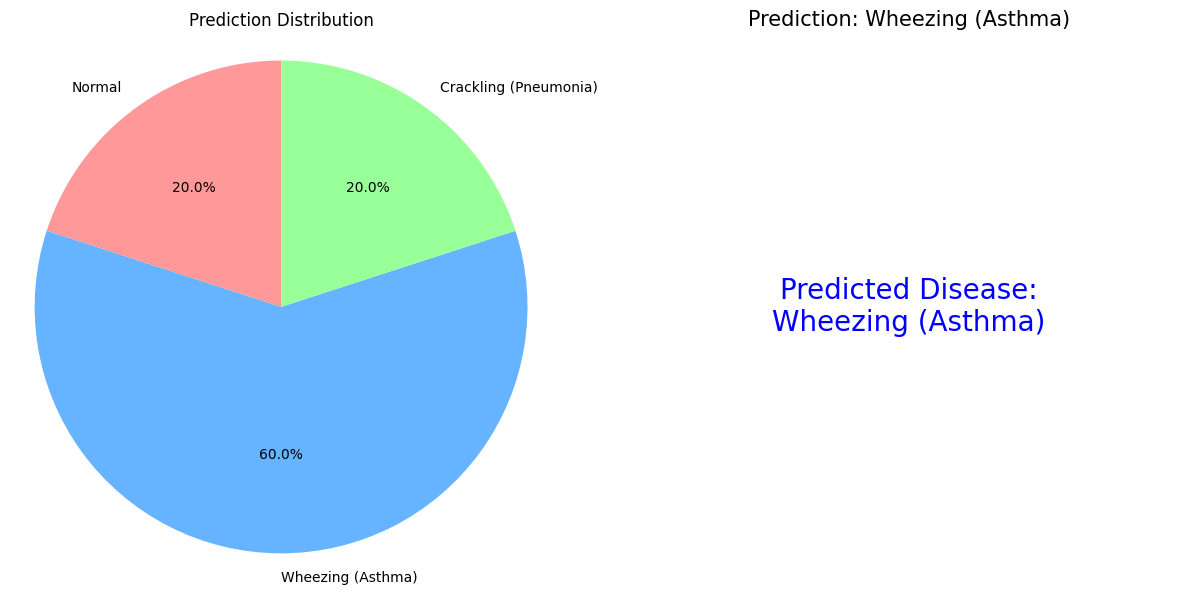

In [ ]:
import matplotlib.pyplot as plt

# Function to plot prediction without icons
def plot_prediction_without_icons(predicted_disease, prediction_probs):
    # Disease categories and their colors
    disease_map = {0: "Normal", 1: "Wheezing (Asthma)", 2: "Crackling (Pneumonia)"}

    # Display prediction using pie chart
    labels = ["Normal", "Wheezing (Asthma)", "Crackling (Pneumonia)"]
    sizes = prediction_probs
    colors = ['#ff9999','#66b3ff','#99ff99']

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart
    ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[0].set_title("Prediction Distribution")

    # Display prediction as a creative text output
    ax[1].text(0.5, 0.5, f"Predicted Disease:\n{predicted_disease}", fontsize=20, ha='center', va='center', color='blue')
    ax[1].axis('off')  # Hide axes for the text
    ax[1].set_title(f"Prediction: {predicted_disease}", fontsize=15)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage (same as before)
prediction_probs = [0.2, 0.6, 0.2]  # Example probabilities for each class
predicted_disease = "Wheezing (Asthma)"

plot_prediction_without_icons(predicted_disease, prediction_probs)


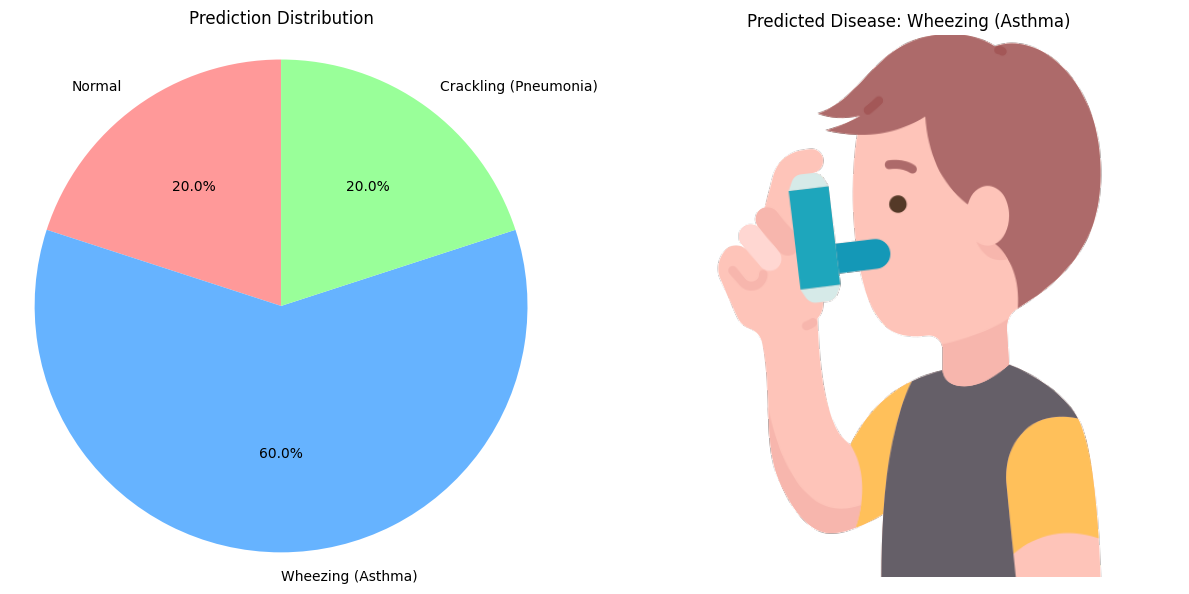

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to plot pie chart and display an icon for the predicted disease
def plot_prediction(predicted_disease, prediction_probs):
    # Disease categories and their colors
    disease_map = {0: "Normal", 1: "Wheezing (Asthma)", 2: "Crackling (Pneumonia)"}
    disease_icons = {
        "Normal": "/content/lungs.png",  # Replace with your actual path
        "Wheezing (Asthma)": "/content/asthma.png",  # Replace with your actual path
        "Crackling (Pneumonia)": "/content/pneumonia.png"  # Replace with your actual path
    }

    # Display prediction using pie chart
    labels = ["Normal", "Wheezing (Asthma)", "Crackling (Pneumonia)"]
    sizes = prediction_probs
    colors = ['#ff9999','#66b3ff','#99ff99']

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart
    ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[0].set_title("Prediction Distribution")

    # Display icon corresponding to the predicted disease
    predicted_disease_icon = disease_icons[predicted_disease]

    # Open the image using PIL
    img = Image.open(predicted_disease_icon)

    # Display the image
    ax[1].imshow(img)
    ax[1].axis('off')  # Hide axes for the image
    ax[1].set_title(f"Predicted Disease: {predicted_disease}")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
prediction_probs = [0.2, 0.6, 0.2]  # Example: 60% chance for Wheezing (Asthma)
predicted_disease = "Wheezing (Asthma)"

plot_prediction(predicted_disease, prediction_probs)
